In [44]:
# import libraries
import pandas as pd

# import ml libraries
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import confusion_matrix, classification_report
 

In [9]:
# read the fifnal .csv file
df = pd.read_csv('thebiglist_final.csv')
df

,Unnamed: 0,Stars,isspicy,haschicken,hasbeef,isseafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,...,is_other,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_South Korea,in_Taiwan,in_Thailand,in_United States,in_other
0,0,5.0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,3.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,5.0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,4.5,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,3.5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3687,3.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3688,3688,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3689,3689,2.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3690,3690,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
# look at the stars column
df['Stars'].value_counts()

5.000    667
3.500    543
3.750    535
4.000    439
4.500    243
3.250    222
4.250    217
3.000    172
2.750    110
2.000     95
2.500     95
4.750     93
1.500     50
0.000     40
1.000     38
2.250     29
1.750     28
0.500     20
0.250     17
1.250     14
2.800      2
1.100      2
2.900      2
3.100      2
4.125      2
0.750      2
3.700      1
3.400      1
2.100      1
3.600      1
1.800      1
2.125      1
0.100      1
0.900      1
3.125      1
2.300      1
2.850      1
3.650      1
3.200      1
Name: Stars, dtype: int64

In [12]:
# import ploting librariees
import matplotlib.pyplot as plt
import seaborn as sns

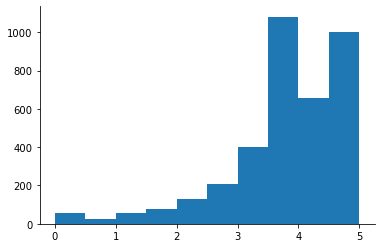

In [13]:
plt.hist(df['Stars'])
sns.despine()

In [15]:
df['Stars'].median()

3.75

In [16]:
len(df[df['Stars'] > 3.75])

1661

In [18]:
df['binStars'] = pd.qcut(df['Stars'], q=2, labels=[0,1])
df

,Unnamed: 0,Stars,isspicy,haschicken,hasbeef,isseafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,...,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_South Korea,in_Taiwan,in_Thailand,in_United States,in_other,binStars
0,0,5.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,3.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,5.0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3,4.5,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,4,3.5,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3687,3.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3688,3688,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3689,3689,2.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3690,3690,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
df['binStars'].value_counts()

0    2031
1    1661
Name: binStars, dtype: int64

In [38]:
# prepare independent and dependent column
x = df.drop(['binStars', 'Stars'], axis=1)
y = df['binStars']

In [40]:
# split dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                   test_size = 0.2,
                                                   stratify = y)

In [46]:
# set the baseline with DummyClassifier
dummy = DummyClassifier()
dummy.fit(x_train, y_train)
dummy_pred = dummy.predict(x_test)

In [50]:
# assess the perfomance of the DummyClassifier
confusion_matrix(y_test, dummy_pred)


array([[407,   0],
       [332,   0]], dtype=int64)

In [51]:
print(classification_report(y_test, dummy_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       407
           1       0.00      0.00      0.00       332

    accuracy                           0.55       739
   macro avg       0.28      0.50      0.36       739
weighted avg       0.30      0.55      0.39       739



C:\Users\owino\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\owino\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\owino\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
# starting with logistic regression
logr = LogisticRegression()
logr.fit(x_train, y_train)
logr_pred = logistic.predict(x_test)

In [61]:
# assesing the perfomance of the linear model
confusion_matrix(y_test, logr_pred)

array([[279, 128],
       [133, 199]], dtype=int64)

In [63]:
# assesing the accuracy of the linear model
print(classification_report(y_test, logr_pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       407
           1       0.61      0.60      0.60       332

    accuracy                           0.65       739
   macro avg       0.64      0.64      0.64       739
weighted avg       0.65      0.65      0.65       739



In [66]:
# moving on to DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)

In [67]:
# Assesing the perfomance of the Decisiontreeclassifier
confusion_matrix(y_test, tree_pred)

array([[287, 120],
       [154, 178]], dtype=int64)

In [68]:
# assesing the accuracy of Decisiontreeclassifier model
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       407
           1       0.60      0.54      0.57       332

    accuracy                           0.63       739
   macro avg       0.62      0.62      0.62       739
weighted avg       0.63      0.63      0.63       739



In [71]:
# moviing on to RandomForestClassifier
rfor = RandomForestClassifier()
rfor.fit(x_train, y_train)
rfor_pred = rfor.predict(x_test)

In [72]:
# assessing the perfomance of the randomforest model
confusion_matrix(y_test, rfor_pred)

array([[268, 139],
       [144, 188]], dtype=int64)

In [73]:
# assessing the accuracy of the randomforest model
print(classification_report(y_test, rfor_pred))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65       407
           1       0.57      0.57      0.57       332

    accuracy                           0.62       739
   macro avg       0.61      0.61      0.61       739
weighted avg       0.62      0.62      0.62       739



Logistic regression is the best model

In [75]:
# features coefficient
logr.coef_[0]

array([ 0.46893339, -0.49441256, -0.14033098, -0.06363068, -1.02915601,
        0.14828232, -0.13424028,  0.42638309,  1.16802394, -0.37756107,
        0.21219875, -0.34162729,  0.67159125, -0.28346376, -0.20715181,
        0.63707589,  2.12833605,  0.11643157,  0.25592957,  0.53678034,
       -0.97800845,  0.31093706,  0.53680204, -0.24826995,  0.4522998 ,
       -0.95184512, -0.89680752, -0.77064351, -0.63878168, -0.81170715,
       -0.36184294,  0.37620688,  0.37536257, -0.22596219, -0.54537546,
        0.09088911, -0.22147113,  1.24184817,  0.17414828,  1.14619744,
        0.68404905,  0.59651575,  0.16851497,  0.64631978, -0.94975556,
        0.15964248, -0.55510077])

In [82]:
logr_feature = pd.DataFrame({"feature": x.columns,
                            "importance": logr.coef_[0]})
logr_feature.sort_values('importance', ascending=False)

,feature,importance
16,from_MyKuali,2.128336
37,is_other,1.241848
8,from_KOKA,1.168024
39,in_Indonesia,1.146197
40,in_Japan,0.684049
12,from_Mama,0.671591
43,in_Taiwan,0.646320
15,from_Master Kong,0.637076
41,in_Malaysia,0.596516
22,from_Samyang Foods,0.536802


In [83]:
tree_feature = pd.DataFrame({"feature": x.columns,
                            "importance": tree.feature_importances_})
tree_feature.sort_values('importance', ascending=False)

,feature,importance
0,isspicy,0.105426
46,in_other,0.101587
34,is_Cup,0.058616
3,isseafood,0.056426
2,hasbeef,0.056124
33,from_other,0.048728
1,haschicken,0.047756
35,is_Pack,0.046819
44,in_Thailand,0.046381
45,in_United States,0.032874


In [84]:
rfor_feature = pd.DataFrame({"feature": x.columns,
                            "importance": rfor.feature_importances_})
rfor_feature.sort_values('importance', ascending=False)

,feature,importance
0,isspicy,0.103383
46,in_other,0.070312
35,is_Pack,0.068880
3,isseafood,0.060792
2,hasbeef,0.057669
1,haschicken,0.056580
34,is_Cup,0.053249
33,from_other,0.042408
45,in_United States,0.033452
40,in_Japan,0.030738


### The End
Recap:
1. Part I -collected and cleaned the dataset for the project
2. Part II- extracteed additional information, visualized the    feature in the data and performed statistical test of difference.
3. part III-engineered new columns based on categorical data.
4. Part IV-trained a ML model to predict instant Ramen       stars(binStars)